In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy.polynomial.polynomial import polyfit
import sklearn
from sklearn import datasets
from sklearn.tree import export_graphviz
import pydot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
import datetime
import graphviz
from graphviz import Source
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df0 = pd.read_csv("jplus_sspp.txt",sep=' ')
df0

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,0355-51788-0064,260.550224,56.905830,6076,4.213,-1.151,F5,17.526304,17.207840,17.092297,16.758161,16.709351,16.497959,16.416205,16.138050,16.092394,15.971630,15.972558,15.942645
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
3,0357-51813-0550,261.044995,56.208497,5646,3.337,-2.025,F5,18.129843,17.700920,17.620277,17.401062,17.290638,17.016707,16.900097,16.544029,16.492199,16.293610,16.253666,16.225510
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
6,0358-51818-0277,262.237362,56.366903,5721,4.479,-1.217,G2,17.471108,17.288258,17.161781,16.844524,16.734047,16.398077,16.264748,15.911975,15.878081,15.702483,15.685789,15.634157
7,0358-51818-0518,263.326016,57.008204,6048,4.040,-1.784,F5,19.284329,18.835606,18.813152,18.524963,18.693676,18.337357,18.269838,17.958914,17.886160,17.780407,17.740013,17.762138
8,0358-51818-0522,264.092504,57.595325,6404,4.225,-1.665,F5,19.019474,18.665943,18.536802,18.377125,18.193298,18.045948,17.902924,17.715183,17.698460,17.632582,17.557308,17.597729
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750


In [4]:
df1=df0[df0.TEFF>7500]
df1

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750
10,0358-51818-0555,264.506016,56.763370,7520,4.089,-1.113,A0,19.402348,18.737839,18.453316,18.196552,18.245270,18.057793,18.007175,18.026157,18.103848,18.115112,18.170582,18.111418
11,0358-51818-0584,264.708855,57.026715,7779,4.026,-1.211,A0,17.947752,17.322285,16.955818,16.784756,16.709492,16.719286,16.684387,16.676348,16.743443,16.719650,16.762789,16.744406
12,0367-51997-0605,261.364546,56.563424,7969,4.390,-1.337,A0,19.186386,18.780720,18.335800,17.916233,17.966175,17.914108,17.929800,18.006424,18.050779,18.041815,18.167316,18.161669
15,0431-51877-0414,113.938322,38.840945,8222,4.294,-1.154,A0,18.739458,18.199085,17.845818,17.489750,17.539259,17.419884,17.486351,17.492248,17.574257,17.573921,17.572670,17.647156
16,0432-51884-0187,115.168512,39.870432,7658,3.110,-1.511,A0,17.000877,16.193214,15.867228,15.629083,15.655346,15.595911,15.558558,15.534168,15.612087,15.567967,15.589592,15.619976


In [5]:
#Colors Indexes:
(uJAVA_J0378) = df1.uJAVA - df1.J0378
(uJAVA_J0410) = df1.uJAVA - df1.J0410
(uJAVA_J0660) = df1.uJAVA - df1.J0660
(uJAVA_J0861) = df1.uJAVA - df1.J0861
(J0378_J0410) = df1.J0378 - df1.J0410
(J0378_J0660) = df1.J0378 - df1.J0660
(J0378_J0861) = df1.J0378 - df1.J0861
(J0410_J0660) = df1.J0410 - df1.J0660
(J0410_J0861) = df1.J0410 - df1.J0861
(J0660_J0861) = df1.J0660 - df1.J0861
(gSDSS_rSDSS) = df1.gSDSS - df1.rSDSS

In [6]:
df2 = pd.DataFrame ({"LOGG": df1.LOGG, "uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861), "gSDSS_rSDSS": (gSDSS_rSDSS)})
df2

,LOGG,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,3.306,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473,-0.060044
2,4.501,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786,-0.165695
4,3.411,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638,-0.188902
5,3.493,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587,-0.009655
9,3.551,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413,0.075565
10,4.089,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734,0.031635
11,4.026,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346,0.042938
12,4.390,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537,-0.092316
15,4.294,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587,-0.072365
16,3.110,0.807663,1.371795,1.388790,1.411285,0.564132,0.581127,0.603622,0.016996,0.039491,0.022495,0.061743


(array([ 8., 62., 55., 23., 10., 19., 58., 83., 62., 31.]),
 array([2.93  , 3.1078, 3.2856, 3.4634, 3.6412, 3.819 , 3.9968, 4.1746,
        4.3524, 4.5302, 4.708 ]),
 <a list of 10 Patch objects>)

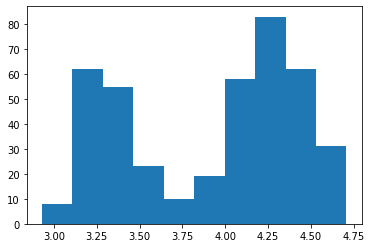

In [7]:
plt.hist(df2['LOGG'])#, bins = np.arange(3.7, 4.1, 0.01))

In [8]:
# Separate the label (target value) from the other features

labels = np.array(df2['LOGG'])
df3 = df2.drop('LOGG', axis = 1)

# Convert the features to a numpy array

df4 = np.array(df3)

# Create two lists of features for later use

df2_list = list(df2.columns)
df3_list = list(df3.columns)

In [9]:
# Split the data into training and testing sets

train_df4, test_df4, train_labels, test_labels = train_test_split(df4, labels, test_size = 0.25, random_state = 42)

In [10]:
# Just making sure that everything is alright so far

print('Training df4 Shape:', train_df4.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing df4 Shape:', test_df4.shape)
print('Testing Labels Shape:', test_labels.shape)

Training df4 Shape: (308, 11)
Training Labels Shape: (308,)
Testing df4 Shape: (103, 11)
Testing Labels Shape: (103,)


In [11]:
# Establish a baseline (average LOGG for all values)
# If the error predicted by the algorithm is greater than the error of the baseline, the algorithm is not effective

baseline_preds = test_df4[:, df2_list.index('LOGG')]

# Calculate the basiline errors

baseline_errors = abs(baseline_preds - test_labels)

# Print the average error

print('LOGG Baseline Error: ', round(np.mean(baseline_errors), 2))

# The error is too close to the average LOGG, which does not seem right
# ?????????????????????????????????????????????????????????????????????
print (baseline_preds)

LOGG Baseline Error:  3.38
[ 0.4414692  0.5820904  0.4546376  0.6664543  0.8830357  0.8846054
 -0.0068569  0.0752773  0.5476131 -0.0263614  0.6149082  0.5593567
  0.6564159  0.6077433  0.6686363  0.7389145  0.6425362  0.8093109
  0.807663   0.1471348  0.8789921  0.5809403  0.553091   0.8272667
  0.7169323  0.3208313  0.7876053  0.847971   0.2637443  0.6788921
  0.843935   0.7648964  0.6212425  0.5818348  0.5394401 -0.0132714
  0.8164654  0.3881684  0.4425239  0.6115284  0.825449   0.4376373
  0.7455463  0.8924103  0.842741   0.4925652  0.8367462  0.5465012
  0.5053616  0.5700473  0.8471394  0.0242424  0.5764008 -0.01688
  0.8527298  0.7991486  0.3096561  0.7167472  0.6689052  0.4335327
  0.6714726  0.1214218  0.54669    0.6461448  0.5833911  0.6430282
  0.5740738  0.6083555  0.5171757  0.585537   0.5487118  0.8880787
  0.6339874  0.444355   0.8386631  0.6380329  0.7824974  0.5827275
  0.4600239  0.6645089  0.5393639  0.8320561  0.6967793  0.6815758
  0.6759014  0.900734   0.8599224  0.

In [12]:
# Instantiate model with 1000 decision trees

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data

rf.fit(train_df4, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [13]:
# Use the forest's predict method on the test data

predictions = rf.predict(test_df4)

# Calculate the absolute errors

errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.15


In [14]:
# Calculate mean absolute percentage error (MAPE)

mape = 100 * (errors / test_labels)

# Calculate and display accuracy

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.06 %.


In [15]:
# Get numerical feature importances

importances = list(rf.feature_importances_)

# List of tuples with variable and importance

df3_importances0 = [(df3, round(importance, 2)) for df3, importance in zip(df3_list, importances)]

# Sort the feature importances by most important first

df3_importances = sorted(df3_importances0, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in df3_importances]

Variable: uJAVA_J0378          Importance: 0.77
Variable: uJAVA_J0410          Importance: 0.05
Variable: gSDSS_rSDSS          Importance: 0.04
Variable: J0378_J0660          Importance: 0.03
Variable: J0660_J0861          Importance: 0.03
Variable: uJAVA_J0660          Importance: 0.02
Variable: J0378_J0861          Importance: 0.02
Variable: J0410_J0660          Importance: 0.02
Variable: uJAVA_J0861          Importance: 0.01
Variable: J0378_J0410          Importance: 0.01
Variable: J0410_J0861          Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importances')

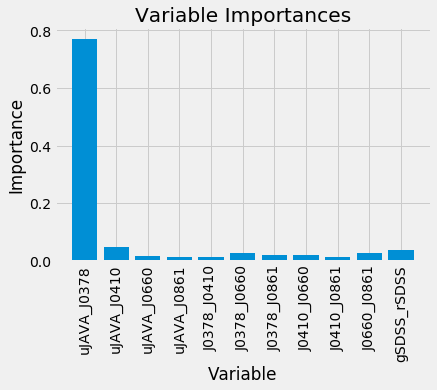

In [16]:
# Use magic command for Jupyter Notebooks

%matplotlib inline

# Set the style

plt.style.use('fivethirtyeight')

# list of x locations for plotting

x_values = list(range(len(importances)))

# Make a bar chart

plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis

plt.xticks(x_values, df3_list, rotation='vertical')

# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

In [17]:
#max1=df2['uJAVA_J0378'].mean()+2*df2['uJAVA_J0378'].std()
#min1=df2['uJAVA_J0378'].mean()-2*df2['uJAVA_J0378'].std()
#print(max1)
#print(min1)
min1 = -0.25
max1 = 0.15

y= 0.632182002564269 + 0.8379320645242053 *x
0.8315298274269509


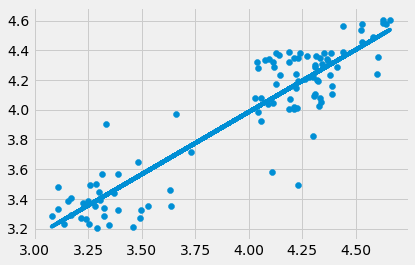

In [18]:
plt.scatter(test_labels,predictions)
b,m = polyfit (test_labels,predictions,1)
np.corrcoef(test_labels,predictions)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(test_labels,b+m*test_labels)
a = np.corrcoef(test_labels,predictions)[0,1]
print(a**2)

The average residual is -0.010527504854375378
The standard deviation of the residual is 0.19730000115898944


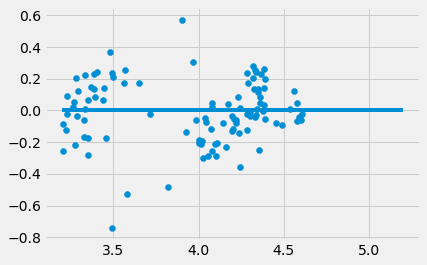

In [19]:
plt.scatter(predictions,predictions-test_labels)
x_const=np.arange(3.2,5.21)
y_const=[0]*len(x_const)
plt.plot(x_const,y_const)

avgres = np.mean(predictions-test_labels)
stdres = np.std(predictions-test_labels)

print('The average residual is', avgres)
print('The standard deviation of the residual is', stdres)

In [20]:
# New random forest with only the two most important variables

rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features

important_indices = [df3_list.index('J0378_J0410'), df3_list.index('uJAVA_J0410')]
train_important = train_df4[:, important_indices]
test_important = test_df4[:, important_indices]

# Train the random forest

rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error

predictions2 = rf_most_important.predict(test_important)
errors2 = abs(predictions2 - test_labels)

# Display the performance metrics

print('Mean Absolute Error:', round(np.mean(errors2), 2))
mape2 = np.mean(100 * (errors2 / test_labels))
accuracy2 = 100 - mape2
print('Accuracy:', round(accuracy2, 2), '%.')

# Interestingly, the smallest error possible does not correspond to the two most important variable
# In fact, J0378_J0410 and uJAVA_J0410 generate a smaller error than the original prediction
# ?????????????????????????????????????????????????????????????????????????????????????????????????

Mean Absolute Error: 0.15
Accuracy: 96.12 %.


In [21]:
# Pull out one tree from the forest

estimator = rf.estimators_[5]

# Export as dot file

export_graphviz(estimator, out_file='tree2.dot', feature_names = df3_list, proportion = False, rounded = True, precision = 1, filled = True)

# Use dot file to create a graph

(graph,) = pydot.graph_from_dot_file('tree2.dot')

# Write graph to a PDF file

path = '/Users/LDPin/OneDrive/Área de Trabalho/University of Notre Dame/Freshman Year/Spring 2020/Research/tree2.dot'
s = Source.from_file(path)


In [22]:
# It is necessary to get rid of the outliers

predictions2 = rf.predict(df4)
avgres2 = np.mean(predictions2-df2.LOGG)
stdres2 = np.std(predictions2-df2.LOGG)
df5 = df2[predictions2-df2.LOGG<avgres2+2*stdres2]
df6 = df5.drop('LOGG', axis = 1)
predictions3 = rf.predict(df6)
avgres3 = np.mean(predictions3-df5.LOGG)
stdres3 = np.std(predictions3-df5.LOGG)
df6 = df5[avgres3-2*stdres3<predictions3-df5.LOGG]
df6

,LOGG,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,3.306,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473,-0.060044
2,4.501,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786,-0.165695
4,3.411,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638,-0.188902
5,3.493,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587,-0.009655
9,3.551,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413,0.075565
10,4.089,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734,0.031635
11,4.026,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346,0.042938
12,4.390,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537,-0.092316
15,4.294,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587,-0.072365
17,4.473,0.687744,1.307478,1.335575,1.215977,0.619734,0.647831,0.528233,0.028097,-0.091501,-0.119598,0.014488


In [23]:
# Now, it is necessary to repeat the random forest calculations with the reduced sample

# Separate the label (target value) from the other features

labels2 = np.array(df6['LOGG'])
df7 = df6.drop('LOGG', axis = 1)

# Convert the features to a numpy array

df8 = np.array(df7)

# Create two lists of features for later use

df6_list = list(df6.columns)
df7_list = list(df7.columns)

In [24]:
# Split the data into training and testing sets

train_df8, test_df8, train_labels2, test_labels2 = train_test_split(df8, labels2, test_size = 0.25, random_state = 42)

In [25]:
# Just making sure that everything is alright so far

print('Training df8 Shape:', train_df8.shape)
print('Training Labels Shape:', train_labels2.shape)
print('Testing df8 Shape:', test_df8.shape)
print('Testing Labels Shape:', test_labels2.shape)

Training df8 Shape: (288, 11)
Training Labels Shape: (288,)
Testing df8 Shape: (96, 11)
Testing Labels Shape: (96,)


In [26]:
# Establish a baseline (average LOGG for all values)
# If the error predicted by the algorithm is greater than the error of the baseline, the algorithm is not effective

baseline_preds2 = test_df8[:, df6_list.index('LOGG')]

# Calculate the basiline errors

baseline_errors2 = abs(baseline_preds2 - test_labels2)

# Print the average error

print('LOGG Baseline Error: ', round(np.mean(baseline_errors2), 2))

# The error is too close to the average LOGG, which does not seem right
# ?????????????????????????????????????????????????????????????????????

LOGG Baseline Error:  3.18


In [27]:
# Instantiate model with 1000 decision trees

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data

rf2.fit(train_df8, train_labels2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [28]:
# Use the forest's predict method on the test data

predictions4 = rf2.predict(test_df8)

# Calculate the absolute errors

errors4 = abs(predictions4 - test_labels2)

# Print out the mean absolute error (mae)

print('Mean Absolute Error:', round(np.mean(errors4), 2))

Mean Absolute Error: 0.13


In [29]:
# Calculate mean absolute percentage error (MAPE)

mape3 = 100 * (errors4 / test_labels2)

# Calculate and display accuracy

accuracy3 = 100 - np.mean(mape3)
print('Accuracy:', round(accuracy3, 2), '%.')

Accuracy: 96.35 %.


In [30]:
# Get numerical feature importances

importances2 = list(rf2.feature_importances_)

# List of tuples with variable and importance

df7_importances0 = [(df7, round(importance, 2)) for df7, importance in zip(df7_list, importances2)]

# Sort the feature importances by most important first

df7_importances = sorted(df7_importances0, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in df7_importances]

Variable: uJAVA_J0378          Importance: 0.83
Variable: uJAVA_J0410          Importance: 0.05
Variable: J0378_J0660          Importance: 0.02
Variable: J0378_J0861          Importance: 0.02
Variable: J0410_J0660          Importance: 0.02
Variable: uJAVA_J0660          Importance: 0.01
Variable: uJAVA_J0861          Importance: 0.01
Variable: J0378_J0410          Importance: 0.01
Variable: J0410_J0861          Importance: 0.01
Variable: J0660_J0861          Importance: 0.01
Variable: gSDSS_rSDSS          Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importances')

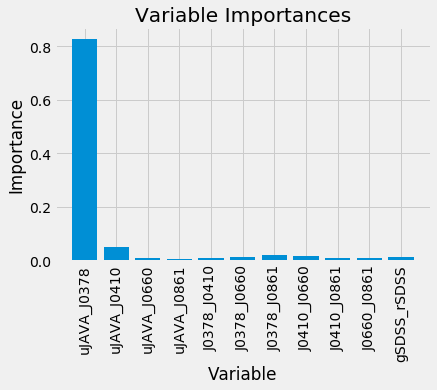

In [31]:
# Use magic command for Jupyter Notebooks

%matplotlib inline

# Set the style

plt.style.use('fivethirtyeight')

# list of x locations for plotting

x_values = list(range(len(importances2)))

# Make a bar chart

plt.bar(x_values, importances2, orientation = 'vertical')

# Tick labels for x axis

plt.xticks(x_values, df7_list, rotation='vertical')

# Axis labels and title

plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

y= 0.7146620130465274 + 0.82321953439794 *x
0.8929090691584876


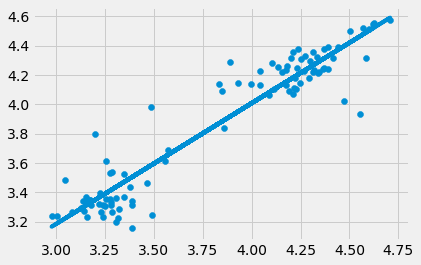

In [32]:
plt.scatter(test_labels2,predictions4)
b,m = polyfit (test_labels2,predictions4,1)
np.corrcoef(test_labels2,predictions4)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(test_labels2,b+m*test_labels2)
a = np.corrcoef(test_labels2,predictions4)[0,1]
print(a**2)

The average residual is 0.03972892708332903
The standard deviation of the residual is 0.17704776313677026


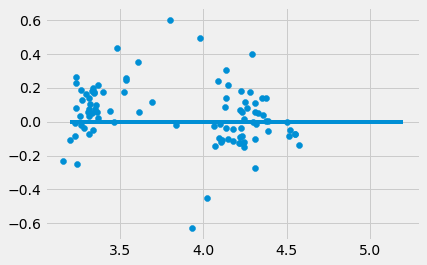

In [33]:
plt.scatter(predictions4,predictions4-test_labels2)
x_const=np.arange(3.2,5.21)
y_const=[0]*len(x_const)
plt.plot(x_const,y_const)

avgres4 = np.mean(predictions4-test_labels2)
stdres4 = np.std(predictions4-test_labels2)

print('The average residual is', avgres4)
print('The standard deviation of the residual is', stdres4)

In [34]:
# New random forest with only the two most important variables

rf2_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features

important_indices2 = [df7_list.index('uJAVA_J0378'), df7_list.index('uJAVA_J0410'), df7_list.index('J0410_J0660')]
train_important2 = train_df8[:, important_indices2]
test_important2 = test_df8[:, important_indices2]

# Train the random forest

rf2_most_important.fit(train_important2, train_labels2)

# Make predictions and determine the error

predictions2 = rf2_most_important.predict(test_important2)
errors3 = abs(predictions2 - test_labels2)

# Display the performance metrics

print('Mean Absolute Error:', round(np.mean(errors3), 2))
mape4 = np.mean(100 * (errors3 / test_labels2))
accuracy4 = 100 - mape4
print('Accuracy:', round(accuracy4, 2), '%.')

Mean Absolute Error: 0.13
Accuracy: 96.29 %.


In [35]:
# Pull out one tree from the forest

estimator = rf2.estimators_[5]

# Export as dot file

export_graphviz(estimator, out_file='tree_LOGG_2.dot', feature_names = df7_list, proportion = False, rounded = True, precision = 1, filled = True)

# Use dot file to create a graph

(graph,) = pydot.graph_from_dot_file('tree_LOGG_2.dot')

# Write graph to a PDF file

path = '/Users/LDPin/OneDrive/Área de Trabalho/University of Notre Dame/Freshman Year/Spring 2020/Research/tree_LOGG_2.dot'
s = Source.from_file(path)
# s.view()
# Only run s.view() to generate the PDF once

In [36]:
# It is also possible to try to control the hyperparameters in order to get a better result

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf3 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf3_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf3_random.fit(train_df8, train_labels2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                                                   n_jobs=None, oob_score=False,
                                                   random_state...


In [37]:
rf3_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [38]:
def evaluate(model, test_important2, test_labels2):
    predictions3 = rf3_random.predict(test_important2)
    errors3 = abs(predictions3 - test_labels2)
    mape3 = 100 * np.mean(errors3 / test_labels2)
    accuracy3 = 100 - mape3
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors3)))
    print('Accuracy = {:0.2f}%.'.format(accuracy3))
    
    return accuracy
base_rf3_random = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_rf3_random.fit(train_important2, train_labels2)
base_accuracy = evaluate(base_rf3_random, test_important2, test_labels2)

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 3 

In [39]:
best_random = rf3_random.best_estimator_
random_accuracy = evaluate(best_random, test_important2, test_labels2)

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 3 

In [40]:
rf4 = RandomForestRegressor(n_estimators = 1200, min_samples_split = 5, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 10, bootstrap = False)
rf4.fit = (train_important2, train_labels2)

In [41]:
def evaluate(model, test_df8, test_labels2):
    predictions5 = model.predict(test_df8)
    errors5 = abs(predictions5 - test_labels2)
    mape5 = 100 * np.mean(errors5 / test_labels2)
    accuracy5 = 100 - mape5
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors5)))
    print('Accuracy = {:0.2f}%.'.format(accuracy5))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_df8, train_labels2)
base_accuracy = evaluate(base_model, test_df8, test_labels2)

Model Performance
Average Error: 0.1383
Accuracy = 96.24%.


In [42]:
dft1 = pd.read_csv('25290.csv')
dft1

,TILE_ID,NUMBER,ALPHA_J2000,DELTA_J2000,FWHM_WORLD,MAG_APER_6_0,morph_prob_star
0,26381,18016,19.580593,4.763881,0.000293,13.433 13.821 13.315 13.272 14.996 14.622 14.5...,1.0
1,26381,18040,20.308061,4.761765,0.000285,13.807 14.296 13.678 13.625 15.687 15.438 15.2...,1.0
2,26063,6371,148.368790,31.489769,0.000357,15.048 15.035 15.077 15.085 16.443 15.543 15.1...,1.0
3,26063,6418,148.270261,31.488841,0.000368,13.236 14.090 12.876 12.678 16.274 16.128 15.8...,1.0
4,26063,6428,147.476431,31.494790,0.000380,14.192 14.915 13.843 13.653 16.917 16.622 16.3...,1.0
5,26057,2311,138.927426,31.261801,0.000313,15.059 15.501 14.918 14.874 16.844 16.558 16.4...,1.0
6,26057,2321,137.878311,31.261267,0.000326,14.407 14.776 14.287 14.263 15.973 15.647 15.5...,1.0
7,26063,6459,147.626353,31.495017,0.000381,14.755 15.086 14.573 14.492 16.134 15.756 15.6...,1.0
8,26063,6582,147.253598,31.498664,0.000389,13.549 14.056 13.314 13.233 15.617 15.448 15.2...,1.0
9,26269,680,229.816578,54.809231,0.000279,15.097 15.606 14.900 14.855 16.961 16.647 16.6...,1.0


In [43]:
test_filters = dft1.MAG_APER_6_0.str.split(expand=True,)
test_filters

,0,1,2,3,4,5,6,7,8,9,10,11
0,13.433,13.821,13.315,13.272,14.996,14.622,14.571,14.145,14.094,13.695,13.407,13.307
1,13.807,14.296,13.678,13.625,15.687,15.438,15.299,14.730,14.663,14.135,13.783,13.658
2,15.048,15.035,15.077,15.085,16.443,15.543,15.161,14.984,14.999,14.937,15.061,15.102
3,13.236,14.090,12.876,12.678,16.274,16.128,15.816,14.921,14.677,13.926,13.041,12.740
4,14.192,14.915,13.843,13.653,16.917,16.622,16.378,15.632,15.456,14.629,13.997,13.704
5,15.059,15.501,14.918,14.874,16.844,16.558,16.469,15.923,15.832,15.353,15.029,14.909
6,14.407,14.776,14.287,14.263,15.973,15.647,15.599,15.126,15.068,14.668,14.396,14.281
7,14.755,15.086,14.573,14.492,16.134,15.756,15.684,15.315,15.257,14.900,14.639,14.534
8,13.549,14.056,13.314,13.233,15.617,15.448,15.259,14.516,14.403,13.825,13.396,13.264
9,15.097,15.606,14.900,14.855,16.961,16.647,16.660,16.019,15.994,15.432,15.052,14.873


In [44]:
test_filters.rename(columns = {"0": "uJAVA", "1": "J0378", "3": "J0410", "8": "J0660", "10": "J0861"})
test_filters.columns = ["rSDSS", "gSDSS", "iSDSS", "zSDSS", "uJAVA", "J0378", "J0395", "J0410", "J0430", "J0515", "J0660", "J0861"]
test_filters

,rSDSS,gSDSS,iSDSS,zSDSS,uJAVA,J0378,J0395,J0410,J0430,J0515,J0660,J0861
0,13.433,13.821,13.315,13.272,14.996,14.622,14.571,14.145,14.094,13.695,13.407,13.307
1,13.807,14.296,13.678,13.625,15.687,15.438,15.299,14.730,14.663,14.135,13.783,13.658
2,15.048,15.035,15.077,15.085,16.443,15.543,15.161,14.984,14.999,14.937,15.061,15.102
3,13.236,14.090,12.876,12.678,16.274,16.128,15.816,14.921,14.677,13.926,13.041,12.740
4,14.192,14.915,13.843,13.653,16.917,16.622,16.378,15.632,15.456,14.629,13.997,13.704
5,15.059,15.501,14.918,14.874,16.844,16.558,16.469,15.923,15.832,15.353,15.029,14.909
6,14.407,14.776,14.287,14.263,15.973,15.647,15.599,15.126,15.068,14.668,14.396,14.281
7,14.755,15.086,14.573,14.492,16.134,15.756,15.684,15.315,15.257,14.900,14.639,14.534
8,13.549,14.056,13.314,13.233,15.617,15.448,15.259,14.516,14.403,13.825,13.396,13.264
9,15.097,15.606,14.900,14.855,16.961,16.647,16.660,16.019,15.994,15.432,15.052,14.873


In [45]:
(uJAVA_J0378) = test_filters.uJAVA - test_filters.J0378
(uJAVA_J0410) = test_filters.uJAVA - test_filters.J0410
(uJAVA_J0660) = test_filters.uJAVA - test_filters.J0660
(uJAVA_J0861) = test_filters.uJAVA - test_filters.J0861
(J0378_J0410) = test_filters.J0378 - test_filters.J0410
(J0378_J0660) = test_filters.J0378 - test_filters.J0660
(J0378_J0861) = test_filters.J0378 - test_filters.J0861
(J0410_J0660) = test_filters.J0410 - test_filters.J0660
(J0410_J0861) = test_filters.J0410 - test_filters.J0861
(J0660_J0861) = test_filters.J0660 - test_filters.J0861
(gSDSS_rSDSS) = test_filters.gSDSS - test_filters.rSDSS

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [46]:
test_filters.J0378.astype(float)

0         14.622
1         15.438
2         15.543
3         16.128
4         16.622
5         16.558
6         15.647
7         15.756
8         15.448
9         16.647
10        15.609
11        14.497
12        15.294
13        16.214
14        15.018
15        14.458
16        14.422
17        16.481
18        16.735
19        14.845
20        16.476
21        15.814
22        16.478
23        15.696
24        14.370
25        15.633
26        13.901
27        15.731
28        16.616
29        14.079
           ...  
155300    16.699
155301    15.437
155302    16.784
155303    16.014
155304    16.298
155305    15.078
155306    15.535
155307    16.324
155308    15.743
155309    16.381
155310    15.608
155311    14.638
155312    16.578
155313    15.319
155314    15.999
155315    15.843
155316    15.186
155317    15.904
155318    16.638
155319    16.008
155320    14.534
155321    15.988
155322    16.242
155323    15.604
155324    14.670
155325    16.551
155326    16.119
155327    14.9

In [47]:
test_filters.J0378.astype(float)-test_filters.uJAVA.astype(float)

0        -0.374
1        -0.249
2        -0.900
3        -0.146
4        -0.295
5        -0.286
6        -0.326
7        -0.378
8        -0.169
9        -0.314
10       -0.215
11       -0.309
12       -0.249
13       -0.157
14       -0.372
15       -0.303
16       -0.304
17       -0.060
18       -0.243
19       -0.346
20       -0.378
21       -0.292
22       -0.239
23       -0.319
24       -0.382
25       -0.334
26       -0.391
27       -0.329
28       -0.273
29       -0.421
          ...  
155300   -0.151
155301   -0.329
155302   -0.200
155303   -0.339
155304   -0.549
155305   -0.319
155306   -0.237
155307   -0.299
155308   -0.291
155309   -0.258
155310   -0.210
155311   -0.339
155312   -0.230
155313   -0.345
155314   -0.162
155315   -0.200
155316   -0.387
155317   -0.154
155318   -0.347
155319   -0.258
155320   -0.373
155321   -0.168
155322   -0.298
155323   -0.218
155324   -0.366
155325   -0.281
155326   -0.225
155327   -0.294
155328   -0.265
155329   -0.295
Length: 155330, dtype: f

In [48]:
test_filters_2 = test_filters.astype(float)

In [49]:
test_filters_2.J0378 - test_filters_2.uJAVA

0        -0.374
1        -0.249
2        -0.900
3        -0.146
4        -0.295
5        -0.286
6        -0.326
7        -0.378
8        -0.169
9        -0.314
10       -0.215
11       -0.309
12       -0.249
13       -0.157
14       -0.372
15       -0.303
16       -0.304
17       -0.060
18       -0.243
19       -0.346
20       -0.378
21       -0.292
22       -0.239
23       -0.319
24       -0.382
25       -0.334
26       -0.391
27       -0.329
28       -0.273
29       -0.421
          ...  
155300   -0.151
155301   -0.329
155302   -0.200
155303   -0.339
155304   -0.549
155305   -0.319
155306   -0.237
155307   -0.299
155308   -0.291
155309   -0.258
155310   -0.210
155311   -0.339
155312   -0.230
155313   -0.345
155314   -0.162
155315   -0.200
155316   -0.387
155317   -0.154
155318   -0.347
155319   -0.258
155320   -0.373
155321   -0.168
155322   -0.298
155323   -0.218
155324   -0.366
155325   -0.281
155326   -0.225
155327   -0.294
155328   -0.265
155329   -0.295
Length: 155330, dtype: f

In [50]:
dft1_colors = pd.DataFrame ({"uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861), "gSDSS_rSDSS": (gSDSS_rSDSS)})
dft1_colors

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473,-0.060044
2,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786,-0.165695
4,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638,-0.188902
5,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587,-0.009655
9,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413,0.075565
10,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734,0.031635
11,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346,0.042938
12,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537,-0.092316
15,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587,-0.072365
16,0.807663,1.371795,1.388790,1.411285,0.564132,0.581127,0.603622,0.016996,0.039491,0.022495,0.061743


In [51]:
dft2_colors = dft1_colors[dft1_colors.gSDSS_rSDSS>min1]
dft3_colors = dft2_colors[dft2_colors.gSDSS_rSDSS<max1]
dft3_colors

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,0.816465,1.424119,1.187652,1.145179,0.607654,0.371186,0.328713,-0.236467,-0.278940,-0.042473,-0.060044
2,0.027954,0.229786,-0.154638,-0.130852,0.201832,-0.182592,-0.158806,-0.384424,-0.360638,0.023786,-0.165695
4,0.799065,1.357873,0.991760,0.853123,0.558808,0.192696,0.054058,-0.366113,-0.504750,-0.138638,-0.188902
5,0.859142,1.399881,1.341736,1.264149,0.540739,0.482594,0.405006,-0.058146,-0.135733,-0.077587,-0.009655
9,0.693861,1.300110,1.200842,1.178429,0.606249,0.506981,0.484568,-0.099268,-0.121681,-0.022413,0.075565
10,0.664509,1.205795,1.298500,1.231766,0.541286,0.633991,0.567257,0.092705,0.025970,-0.066734,0.031635
11,0.625467,1.162996,1.204309,1.184963,0.537529,0.578842,0.559496,0.041313,0.021967,-0.019346,0.042938
12,0.405666,1.270153,1.135607,1.019070,0.864487,0.729940,0.613403,-0.134546,-0.251083,-0.116537,-0.092316
15,0.540373,1.249708,1.165201,1.166788,0.709335,0.624828,0.626415,-0.084507,-0.082920,0.001587,-0.072365
16,0.807663,1.371795,1.388790,1.411285,0.564132,0.581127,0.603622,0.016996,0.039491,0.022495,0.061743


In [52]:
newpredictions = best_random.predict(dft1_colors)
newpredictions

array([3.38931713, 4.51078537, 3.42656955, 3.24181406, 3.76336657,
       4.06042504, 4.12658581, 4.24828488, 4.33000054, 3.42615543,
       4.02611436, 4.06939355, 3.25159346, 3.84835564, 4.48866241,
       4.35289484, 4.39319441, 4.22395119, 4.62967234, 3.22665364,
       4.29267893, 4.09513748, 4.21023365, 3.26365512, 4.21280815,
       3.24037046, 4.48569504, 4.51013645, 3.34939241, 4.57606039,
       3.86651203, 4.12135106, 4.19920539, 4.28234577, 3.49257324,
       3.24671337, 3.26504601, 4.23272617, 3.3324306 , 4.32142658,
       4.59929443, 4.38861221, 4.27311689, 4.29490715, 3.967691  ,
       4.30686261, 4.44697365, 3.26877574, 4.0803275 , 4.16610232,
       3.60057354, 4.47410579, 4.46240876, 4.24394998, 4.22299585,
       3.31794074, 4.41200612, 4.2247034 , 4.18169664, 3.1464534 ,
       3.33809656, 3.44064681, 4.23129882, 4.05631901, 3.54298262,
       4.57354012, 3.35258892, 4.45194852, 4.53963316, 4.20019692,
       4.38042381, 4.33224432, 4.32876428, 3.26189659, 4.34327

In [53]:
(uJAVA_J0378) = test_filters_2.uJAVA - test_filters_2.J0378
(uJAVA_J0410) = test_filters_2.uJAVA - test_filters_2.J0410
(uJAVA_J0660) = test_filters_2.uJAVA - test_filters_2.J0660
(uJAVA_J0861) = test_filters_2.uJAVA - test_filters_2.J0861
(J0378_J0410) = test_filters_2.J0378 - test_filters_2.J0410
(J0378_J0660) = test_filters_2.J0378 - test_filters_2.J0660
(J0378_J0861) = test_filters_2.J0378 - test_filters_2.J0861
(J0410_J0660) = test_filters_2.J0410 - test_filters_2.J0660
(J0410_J0861) = test_filters_2.J0410 - test_filters_2.J0861
(J0660_J0861) = test_filters_2.J0660 - test_filters_2.J0861

In [54]:
test = pd.DataFrame ({"uJAVA_J0378": (uJAVA_J0378), "uJAVA_J0410": (uJAVA_J0410), "uJAVA_J0660": (uJAVA_J0660), "uJAVA_J0861": (uJAVA_J0861), "J0378_J0410": (J0378_J0410), "J0378_J0660": (J0378_J0660), "J0378_J0861": (J0378_J0861), "J0410_J0660": (J0410_J0660), "J0410_J0861": (J0410_J0861), "J0660_J0861": (J0660_J0861), "gSDSS_rSDSS": (gSDSS_rSDSS)})
test

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
0,0.374,0.851,1.589,1.689,0.477,1.215,1.315,0.738,0.838,0.100,NaN
1,0.249,0.957,1.904,2.029,0.708,1.655,1.780,0.947,1.072,0.125,-0.060044
2,0.900,1.459,1.382,1.341,0.559,0.482,0.441,-0.077,-0.118,-0.041,-0.165695
3,0.146,1.353,3.233,3.534,1.207,3.087,3.388,1.880,2.181,0.301,NaN
4,0.295,1.285,2.920,3.213,0.990,2.625,2.918,1.635,1.928,0.293,-0.188902
5,0.286,0.921,1.815,1.935,0.635,1.529,1.649,0.894,1.014,0.120,-0.009655
6,0.326,0.847,1.577,1.692,0.521,1.251,1.366,0.730,0.845,0.115,NaN
7,0.378,0.819,1.495,1.600,0.441,1.117,1.222,0.676,0.781,0.105,NaN
8,0.169,1.101,2.221,2.353,0.932,2.052,2.184,1.120,1.252,0.132,NaN
9,0.314,0.942,1.909,2.088,0.628,1.595,1.774,0.967,1.146,0.179,0.075565


In [55]:
test2 = test[test.gSDSS_rSDSS>min1]
test3 = test[test.gSDSS_rSDSS<max1]
test3

,uJAVA_J0378,uJAVA_J0410,uJAVA_J0660,uJAVA_J0861,J0378_J0410,J0378_J0660,J0378_J0861,J0410_J0660,J0410_J0861,J0660_J0861,gSDSS_rSDSS
1,0.249,0.957,1.904,2.029,0.708,1.655,1.780,0.947,1.072,0.125,-0.060044
2,0.900,1.459,1.382,1.341,0.559,0.482,0.441,-0.077,-0.118,-0.041,-0.165695
4,0.295,1.285,2.920,3.213,0.990,2.625,2.918,1.635,1.928,0.293,-0.188902
5,0.286,0.921,1.815,1.935,0.635,1.529,1.649,0.894,1.014,0.120,-0.009655
9,0.314,0.942,1.909,2.088,0.628,1.595,1.774,0.967,1.146,0.179,0.075565
10,0.215,1.044,2.189,2.332,0.829,1.974,2.117,1.145,1.288,0.143,0.031635
11,0.309,0.898,1.884,2.045,0.589,1.575,1.736,0.986,1.147,0.161,0.042938
12,0.249,1.018,2.113,2.264,0.769,1.864,2.015,1.095,1.246,0.151,-0.092316
15,0.303,0.894,1.763,1.903,0.591,1.460,1.600,0.869,1.009,0.140,-0.072365
16,0.304,0.866,1.767,1.907,0.562,1.463,1.603,0.901,1.041,0.140,0.061743


In [56]:
newpredictions = best_random.predict(test3)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  10.,  10.,  44.,  24.,  73.,  98., 103.,
         18.,   7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([3.9 , 3.91, 3.92, 3.93, 3.94, 3.95, 3.96, 3.97, 3.98, 3.99, 4.  ,
        4.01, 4.02, 4.03, 4.04, 4.05, 4.06, 4.07, 4.08, 4.09, 4.1 , 4.11,
        4.12, 4.13, 4.14, 4.15, 4.16, 4.17, 4.18, 4.19, 4.2 , 4.21, 4.22,
        4.23, 4.24, 4.25, 4.26, 4.27, 4.28, 4.29]),
 <a list of 39 Patch objects>)

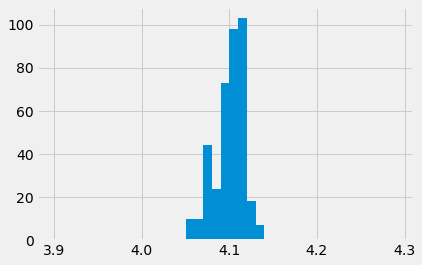

In [57]:
plt.hist(newpredictions, bins = np.arange(3.9, 4.3, 0.01))

In [100]:
myStilts = "stilts"
command = myStilts + " cdsskymatch cdstable=I/345/gaia2 in=" + thisVOTable + " ra=ALPHA_J2000 dec=DELTA_J2000 radius=1.0 out=Gaia" + thisVOTable + ".votable"
print (command)
os.system(command)

NameError: name 'thisVOTable' is not defined